<a href="https://colab.research.google.com/github/hemanth346/eva4/blob/master/S8/S8_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchsummary

In [2]:
!git clone https://github.com/hemanth346/pytorch-wrapper.git || rm -r pytorch-wrapper && git clone https://github.com/hemanth346/pytorch-wrapper.git 

Cloning into 'pytorch-wrapper'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 63 (delta 28), reused 55 (delta 20), pack-reused 0
Unpacking objects: 100% (63/63), done.
fatal: destination path 'pytorch-wrapper' already exists and is not an empty directory.


In [3]:
!ls -l pytorch-wrapper/engine

total 44
-rw-r--r-- 1 root root 2093 Mar 10 14:47 data_loader.py
-rw-r--r-- 1 root root  427 Mar 10 14:47 __init__.py
-rw-r--r-- 1 root root 1067 Mar 10 14:47 learner.py
-rw-r--r-- 1 root root 7516 Mar 10 14:47 models.py
-rw-r--r-- 1 root root  645 Mar 10 14:47 plots.py
-rw-r--r-- 1 root root 3884 Mar 10 14:47 trainer.py
-rw-r--r-- 1 root root 1688 Mar 10 14:47 utils.py
-rw-r--r-- 1 root root   51 Mar 10 14:47 version.py
-rw-r--r-- 1 root root 5713 Mar 10 14:47 visualize.py


In [0]:
import sys  
import os
sys.path.insert(0, os.path.abspath('pytorch-wrapper'))

In [0]:
# autoreload module content
%load_ext autoreload
%autoreload 2

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torchvision.transforms as transforms

In [0]:
import engine

In [0]:
from engine.data_loader import DataLoader
from engine.models import Net, ResNet, BasicBlock#, summary
from engine.learner import Learner

In [9]:
train_loader, test_loader = DataLoader.get_cifar10(batch_size=64, seed=18)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
ResNet18 = ResNet(BasicBlock, [2,2,2,2])

In [11]:
# !pip install torchsummary
from torchsummary import summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
ResNet18 = ResNet18.to(device)
summary(ResNet18, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ResNet18.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [0]:
model = Learner(ResNet18, train_loader, test_loader, criterion, optimizer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 frog  ship   dog  bird  ship


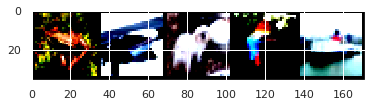

In [14]:
model.show_images(5)

In [15]:
model.run_epochs(20)


Epoch: 1


Test Set: Accuracy: 61.51 (6151/10000) | Average Loss: 1.07093

Epoch: 2


Test Set: Accuracy: 76.53 (7653/10000) | Average Loss: 0.69290

Epoch: 3


Test Set: Accuracy: 76.79 (7679/10000) | Average Loss: 0.73415

Epoch: 4


Test Set: Accuracy: 79.11 (7911/10000) | Average Loss: 0.60627

Epoch: 5


Test Set: Accuracy: 78.18 (7818/10000) | Average Loss: 0.74509

Epoch: 6


Test Set: Accuracy: 81.31 (8131/10000) | Average Loss: 0.64797

Epoch: 7


Test Set: Accuracy: 80.06 (8006/10000) | Average Loss: 0.78530

Epoch: 8


Test Set: Accuracy: 81.17 (8117/10000) | Average Loss: 0.73701

Epoch: 9


Test Set: Accuracy: 81.89 (8189/10000) | Average Loss: 0.75870

Epoch: 10


Test Set: Accuracy: 82.06 (8206/10000) | Average Loss: 0.75477

Epoch: 11


Test Set: Accuracy: 82.60 (8260/10000) | Average Loss: 0.79019

Epoch: 12


Test Set: Accuracy: 82.55 (8255/10000) | Average Loss: 0.79005

Epoch: 13


Test Set: Accuracy: 84.07 (8407/10000) | Average Loss: 0.81008

Epoch: 14


Test Set: Accuracy: 83.91 (8391/10000) | Average Loss: 0.80555

Epoch: 15


Test Set: Accuracy: 83.06 (8306/10000) | Average Loss: 0.87391

Epoch: 16


Test Set: Accuracy: 83.17 (8317/10000) | Average Loss: 0.85212

Epoch: 17


Test Set: Accuracy: 83.37 (8337/10000) | Average Loss: 0.83537

Epoch: 18


Test Set: Accuracy: 84.52 (8452/10000) | Average Loss: 0.81756

Epoch: 19


Test Set: Accuracy: 84.15 (8415/10000) | Average Loss: 0.85628

Epoch: 20


Test Set: Accuracy: 83.48 (8348/10000) | Average Loss: 0.88644


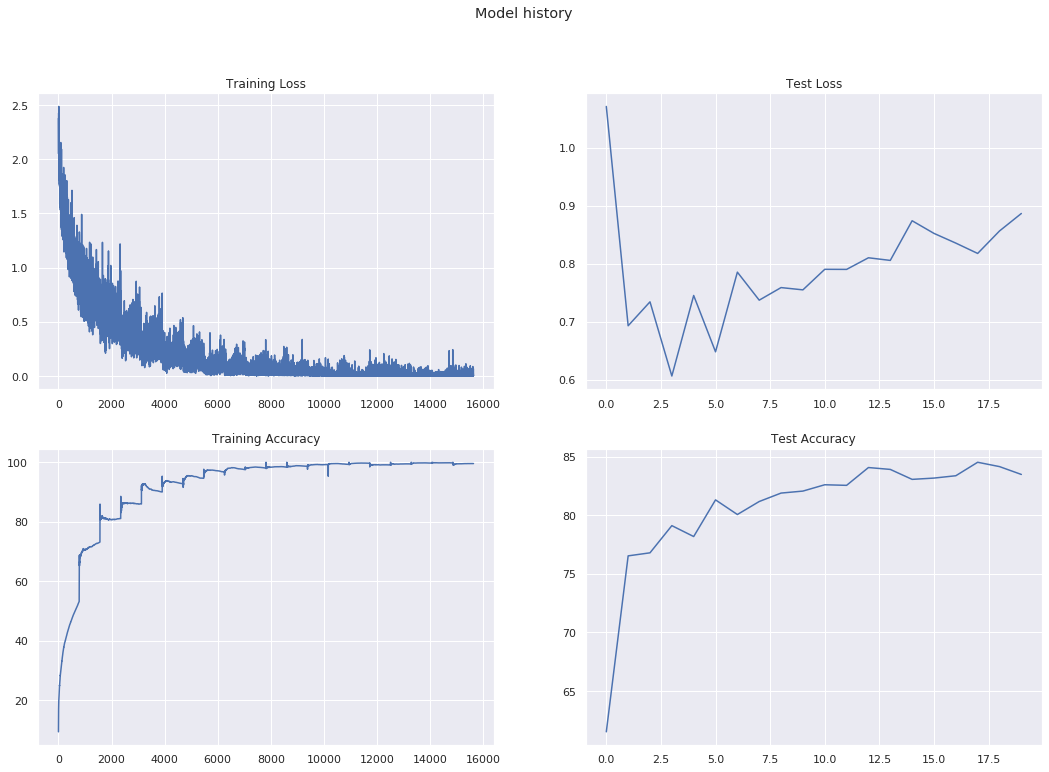

In [16]:
model.show_history()

In [17]:
model.classwise_accuracy()

Accuracy of plane      : 91.67%
Accuracy of car        : 77.94%
Accuracy of bird       : 73.49%
Accuracy of cat        : 72.13%
Accuracy of deer       : 82.09%
Accuracy of dog        : 72.73%
Accuracy of frog       : 92.45%
Accuracy of horse      : 80.00%
Accuracy of ship       : 85.29%
Accuracy of truck      : 92.21%


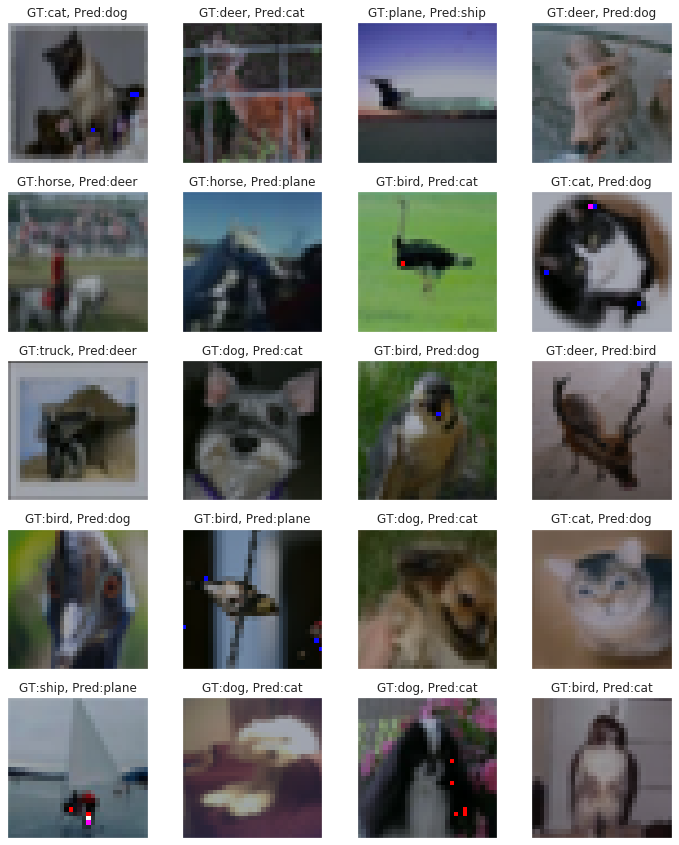

In [18]:
model.plot_misclassified()

In [0]:
import torchvision.transforms as transforms
transformations = [
                 transforms.ColorJitter(brightness=0.2, contrast=0.3, saturation=0.5),
                 transforms.RandomResizedCrop((27,27)),
                 transforms.RandomHorizontalFlip(p=0.3),
                 transforms.RandomRotation(9)
]

In [38]:
train_loader, test_loader = DataLoader.get_cifar10(batch_size=64, augmentations=transformations, seed=18)

Train transforms :  [ColorJitter(brightness=[0.8, 1.2], contrast=[0.7, 1.3], saturation=[0.5, 1.5], hue=None), RandomResizedCrop(size=(27, 27), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR), RandomHorizontalFlip(p=0.3), RandomRotation(degrees=(-9, 9), resample=False, expand=False), ToTensor(), Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))]
Test transforms :  [ToTensor(), Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))]
Files already downloaded and verified
Files already downloaded and verified


In [0]:
ResNet18_aug = ResNet(BasicBlock, [2,2,2,2])
ResNet18_aug = ResNet18_aug.to(device)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ResNet18_aug.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [0]:
aug_model = Learner(ResNet18_aug, train_loader, test_loader, criterion, optimizer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat  bird   dog truck  bird


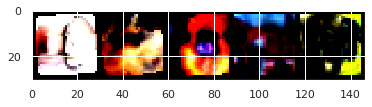

In [48]:
aug_model.show_images(5)

In [50]:
aug_model.run_epochs(20)


Epoch: 1


Test Set: Accuracy: 46.79 (4679/10000) | Average Loss: 1.47040

Epoch: 2


Test Set: Accuracy: 55.91 (5591/10000) | Average Loss: 1.21544

Epoch: 3


Test Set: Accuracy: 57.13 (5713/10000) | Average Loss: 1.31464

Epoch: 4


Test Set: Accuracy: 68.84 (6884/10000) | Average Loss: 0.89629

Epoch: 5


Test Set: Accuracy: 71.05 (7105/10000) | Average Loss: 0.85932

Epoch: 6


Test Set: Accuracy: 72.70 (7270/10000) | Average Loss: 0.79019

Epoch: 7


Test Set: Accuracy: 76.47 (7647/10000) | Average Loss: 0.67878

Epoch: 8


Test Set: Accuracy: 77.36 (7736/10000) | Average Loss: 0.65270

Epoch: 9


Test Set: Accuracy: 73.76 (7376/10000) | Average Loss: 0.80828

Epoch: 10


Test Set: Accuracy: 76.97 (7697/10000) | Average Loss: 0.70870

Epoch: 11


Test Set: Accuracy: 79.08 (7908/10000) | Average Loss: 0.62683

Epoch: 12


Test Set: Accuracy: 80.06 (8006/10000) | Average Loss: 0.60136

Epoch: 13


Test Set: Accuracy: 80.61 (8061/10000) | Average Loss: 0.57337

Epoch: 14


Test Set: Accuracy: 82.93 (8293/10000) | Average Loss: 0.49620

Epoch: 15


Test Set: Accuracy: 82.24 (8224/10000) | Average Loss: 0.52868

Epoch: 16


Test Set: Accuracy: 80.91 (8091/10000) | Average Loss: 0.56646

Epoch: 17


Test Set: Accuracy: 81.23 (8123/10000) | Average Loss: 0.56372

Epoch: 18


Test Set: Accuracy: 85.59 (8559/10000) | Average Loss: 0.42375

Epoch: 19


Test Set: Accuracy: 82.96 (8296/10000) | Average Loss: 0.52837

Epoch: 20


Test Set: Accuracy: 84.52 (8452/10000) | Average Loss: 0.46389


In [51]:
aug_model.run_epochs(10)


Epoch: 1


Test Set: Accuracy: 85.90 (8590/10000) | Average Loss: 0.42885

Epoch: 2


Test Set: Accuracy: 85.28 (8528/10000) | Average Loss: 0.43800

Epoch: 3


Test Set: Accuracy: 82.62 (8262/10000) | Average Loss: 0.52304

Epoch: 4


Test Set: Accuracy: 85.54 (8554/10000) | Average Loss: 0.44668

Epoch: 5


Test Set: Accuracy: 86.06 (8606/10000) | Average Loss: 0.40542

Epoch: 6


Test Set: Accuracy: 86.19 (8619/10000) | Average Loss: 0.40801

Epoch: 7


Test Set: Accuracy: 87.51 (8751/10000) | Average Loss: 0.36535

Epoch: 8


Test Set: Accuracy: 86.80 (8680/10000) | Average Loss: 0.39848

Epoch: 9


Test Set: Accuracy: 87.61 (8761/10000) | Average Loss: 0.36488

Epoch: 10


Test Set: Accuracy: 86.17 (8617/10000) | Average Loss: 0.40942


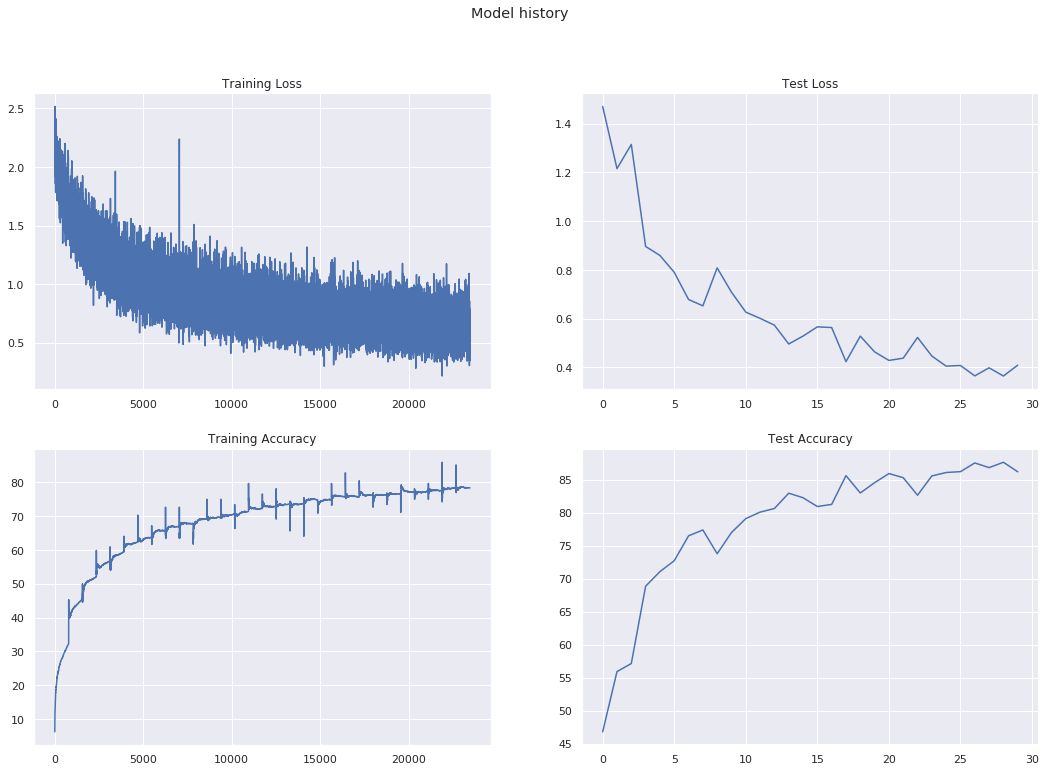

In [53]:
aug_model.show_history()

In [54]:
aug_model.classwise_accuracy()

Accuracy of plane      : 90.00%
Accuracy of car        : 91.67%
Accuracy of bird       : 79.17%
Accuracy of cat        : 53.70%
Accuracy of deer       : 93.33%
Accuracy of dog        : 85.71%
Accuracy of frog       : 86.96%
Accuracy of horse      : 96.88%
Accuracy of ship       : 90.32%
Accuracy of truck      : 94.34%


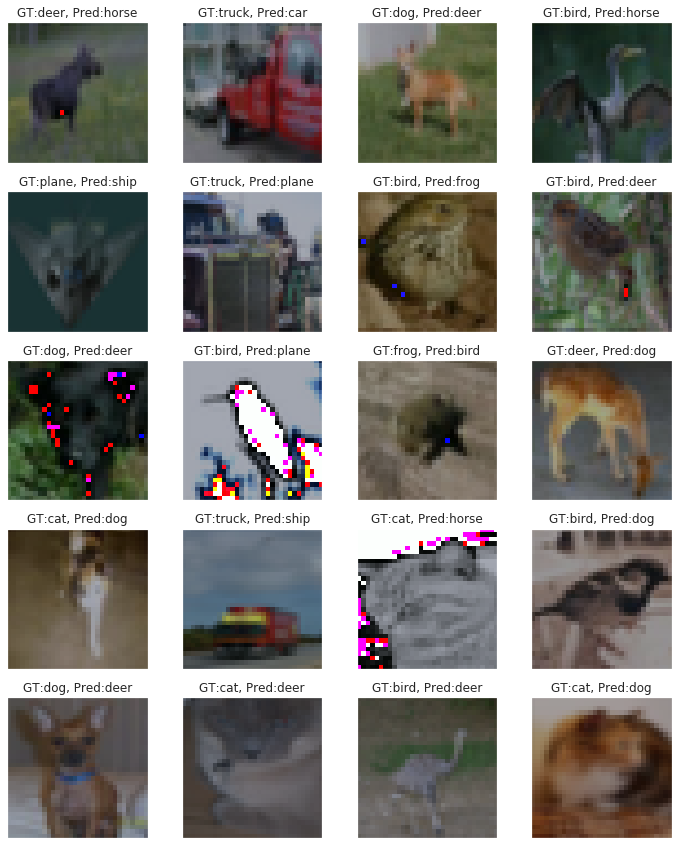

In [55]:
aug_model.plot_misclassified()